In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
## LET'S DO SOME UNIVARIATE ANALYSIS


#Setting up a function to plot variables as bar plot. 
#The categorical are separated because some are quite unique as ["Name", "Ticket", "Cabin"]
# hence plotting them in a bar plot wouldn't have sense

def bar_plot(variable):
    """ 
    input a variable
    output bar plot & value count
    """
    #get feature
    var = train_df[variable]
    
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()
    
    # plot
    plt.figure(figsize = (12,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

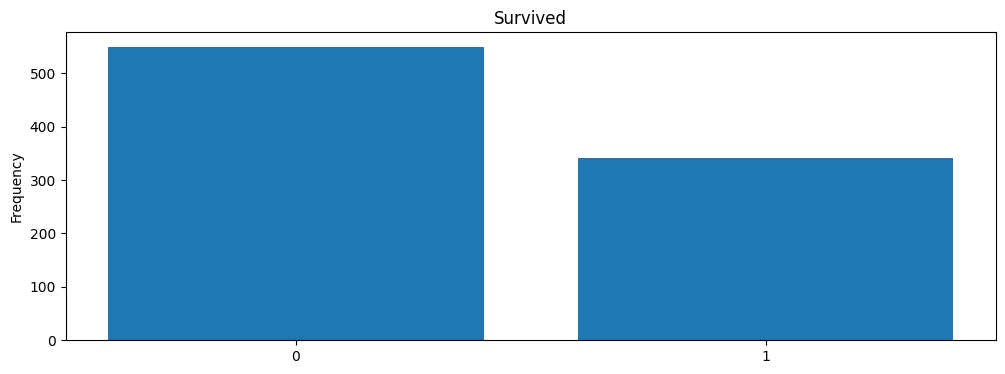

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


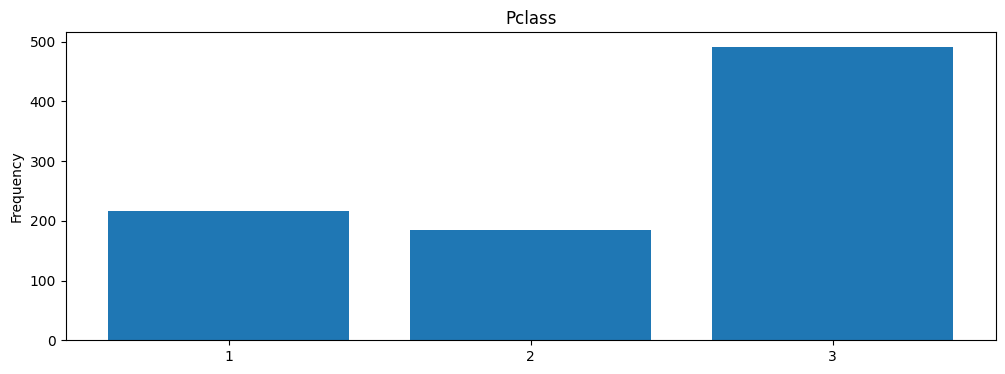

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


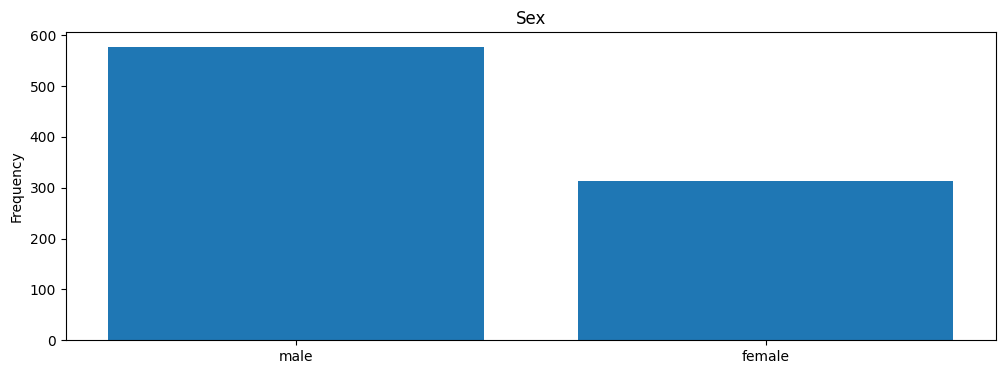

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


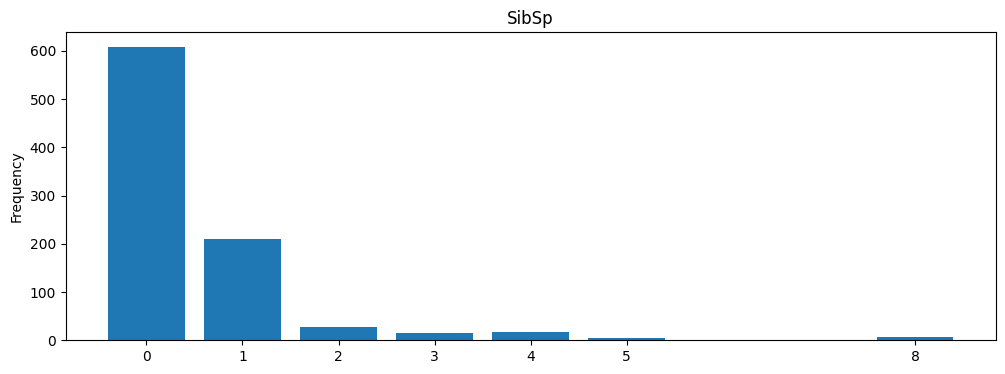

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


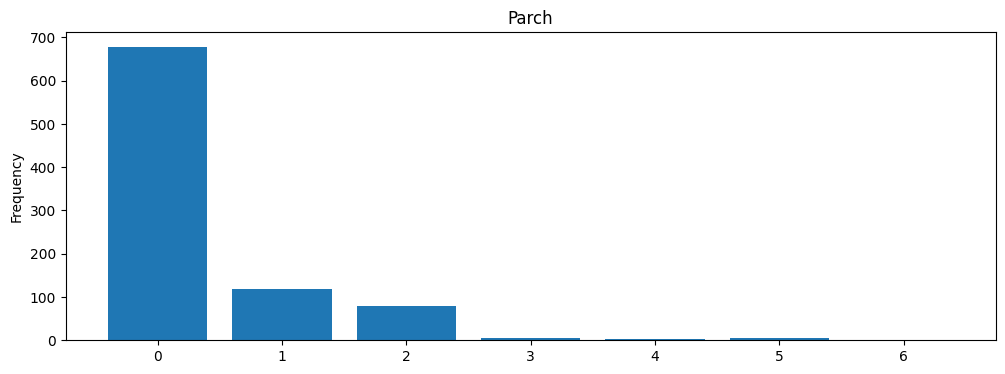

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


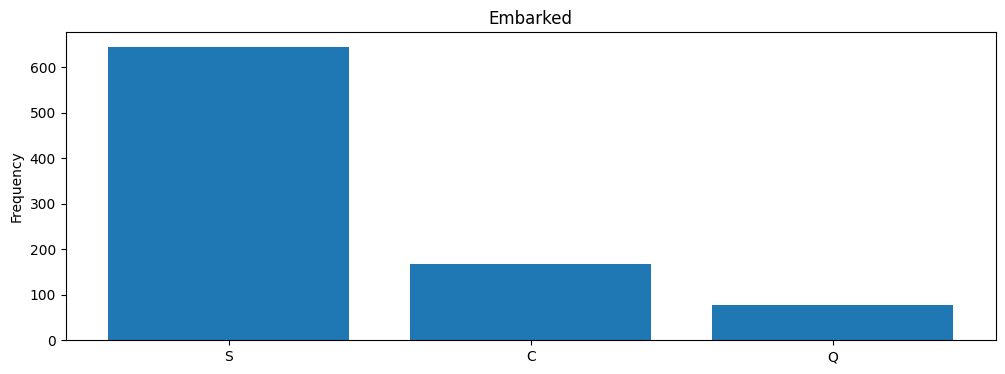

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
# Plotting Categorical variables
categorical_1 = ["Survived","Pclass","Sex","SibSp", "Parch","Embarked"]
for k in categorical_1:
    bar_plot(k)

In [8]:
categorical_2 = ["Name","Ticket","Cabin"]
for k in categorical_2:
    print("{} \n".format(train_df[k].value_counts()))

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 



In [9]:
# Now let's do the numerical variables for which we can use an intogram

def plot_hist(var):
    plt.figure(figsize = (12, 4))
    plt.hist(train_df[var], bins = 50)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("{} Hist Distribution".format(var))
    plt.show()

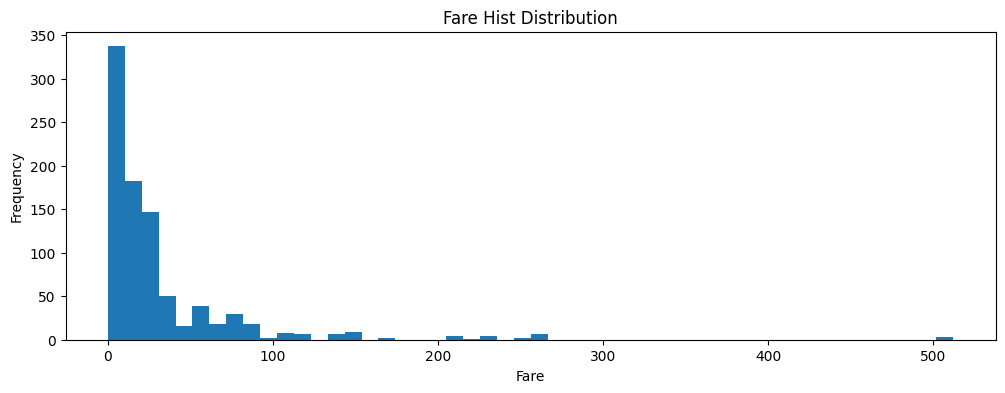

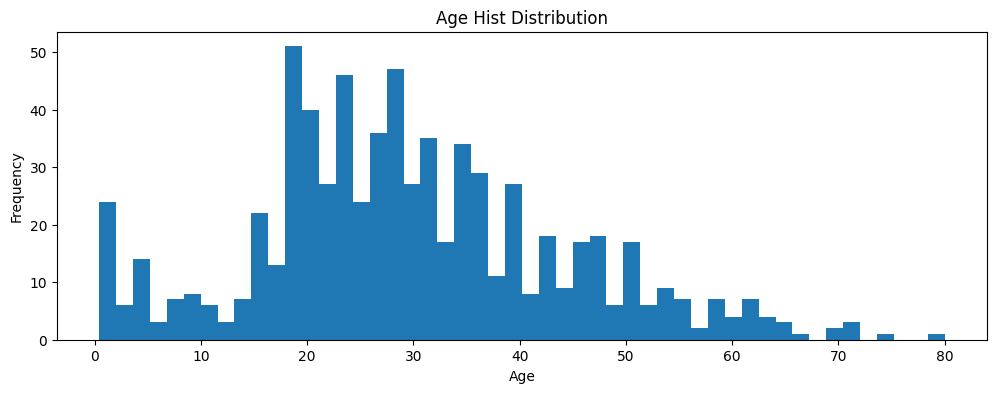

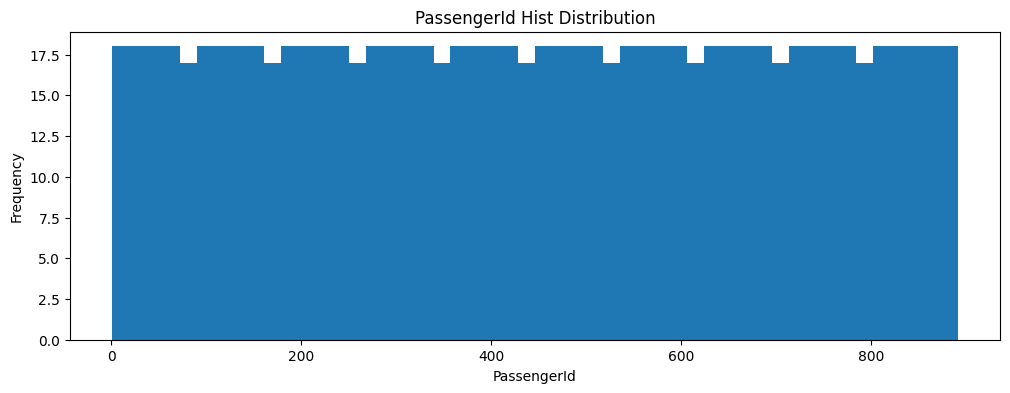

In [10]:
numeric = ["Fare", "Age", "PassengerId"]
for j in numeric:
    plot_hist(j)

In [11]:
# BASIC DATA ANALYSIS 
# as foundation for understanding and extracting valuable insights.

# Pclass - survived

train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",
                                                                                         ascending =False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# Sex - survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",
                                                                                         ascending =False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# SibSp - Survived
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",
                                                                                         ascending =False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# Parch - Survived

train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",
                                                                                         ascending =False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
## DATA CLEANING - outlier detection and missing values

#We will do OUTLIER DETECTION.
#We have some outlier values in the dataset. 
#If you pass this step, you can't have good score in your model. You shouldn't pass!

#You can find a lot of method for outlier detection like IQR, z-score etc. . 
#We will use IQR test in this dataset.

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [16]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
# We found some outlier values. We need to drop from dataset.

train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [18]:
# Missing Values
# We can see some missing value columns.
train_df.columns[train_df.isnull().any()]


Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [19]:
# We can see the sum of missing values by column.

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [20]:
# Fill Missing Values 
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


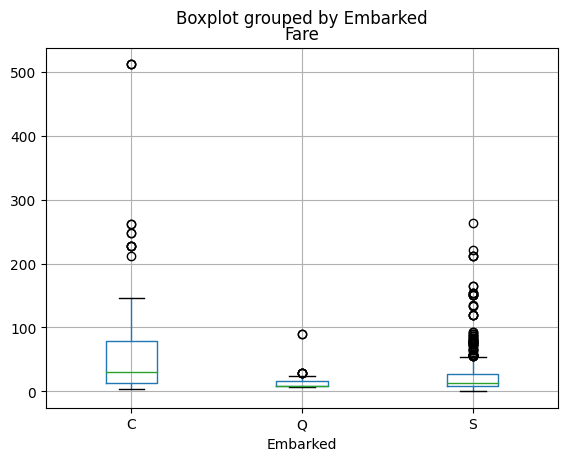

In [21]:
# We can see the missing data rows according to Embarked column in the top. 
# Now, I want to show visualization of "Embarked" column with boxplot to understand what to fill them with

train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [22]:
# They are missing in C 
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
# Same with age

train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


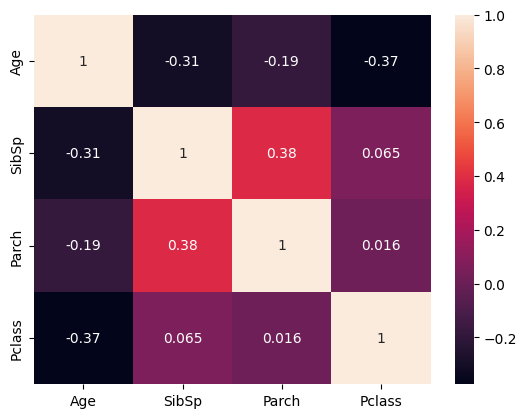

In [24]:
# We need to see relationship of "Age" feature with other features. We will create correlation matrix in here:
sns.heatmap(train_df[["Age","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()


In [25]:
# We will fill according to correlation relationship. 
# Considering the correlation with these features, we can follow a method like the one 
# below to fill in the missing values!

index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [26]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
# Feature transformation 

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [28]:
# Label encoder converts non numerica types to numerical types

non_numeric_features=['Embarked', 'Sex','Age', 'Fare']

label_encoder = LabelEncoder()

for column in non_numeric_features:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [29]:
# One-Hot Encoding the Categorical Features

cat_features = ['Pclass', 'Sex', 'Embarked']
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(train_df[cat_features]).toarray()

column_names = []
for i, column in enumerate(cat_features):
    unique_labels = train_df[column].unique()
    
    names = [f"{column}_{label}" for label in unique_labels]
    column_names.extend(names)

one_hot_encoded_df = pd.DataFrame(encoded_features, columns=column_names)

train_df = pd.concat([train_df, one_hot_encoded_df], axis=1)

In [30]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_3,Pclass_1,Pclass_2,Sex_1,Sex_0,Embarked_2,Embarked_0,Embarked_1
0,1,0,3,"Braund, Mr. Owen Harris",1,29,1,0,A/5 21171,18,NaN,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,53,1,0,PC 17599,206,C85,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,35,0,0,STON/O2. 3101282,41,NaN,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,189,C123,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,48,0,0,373450,43,NaN,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",1,35,0,0,330877,51,NaN,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,72,0,0,17463,186,E46,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,6,3,1,349909,124,NaN,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,36,0,2,347742,74,NaN,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,19,1,0,237736,154,NaN,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
# Drop passenger ID and Cabin 
train_df.drop(labels = ["PassengerId", "Cabin", "Name", "Ticket"], axis = 1, inplace = True)


In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_3,Pclass_1,Pclass_2,Sex_1,Sex_0,Embarked_2,Embarked_0,Embarked_1
0,0,3,1,29,1,0,18,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,1,0,53,1,0,206,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,3,0,35,0,0,41,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,1,0,48,1,0,189,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,3,1,48,0,0,43,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
# MOdelling 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [34]:
# Pre-process my test_set as well
# Label encoder converts non numerica types to numerical types

non_numeric_features=['Embarked', 'Sex','Age', 'Fare']

label_encoder = LabelEncoder()

for column in non_numeric_features:
    test_df[column] = label_encoder.fit_transform(test_df[column])
    
    
# One-Hot Encoding the Categorical Features

cat_features = ['Pclass', 'Sex', 'Embarked']
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(test_df[cat_features]).toarray()

column_names = []
for i, column in enumerate(cat_features):
    unique_labels = test_df[column].unique()
    
    names = [f"{column}_{label}" for label in unique_labels]
    column_names.extend(names)

one_hot_encoded_df = pd.DataFrame(encoded_features, columns=column_names)

test_df = pd.concat([test_df, one_hot_encoded_df], axis=1)


# Drop passenger ID and Cabin 
test_df.drop(labels = ["Cabin", "Name", "Ticket"], axis = 1, inplace = True)


In [35]:
print("test_df:", len(test_df))
print("train_df", len(train_df))

test_df: 418
train_df 881


In [36]:
# Now that my data have been cleansed I can train the ML on the train set. To do so I first need to 
# separate the features (X) from the target variable (y) in the training set. 

y_train = train_df["Survived"]
X_train = train_df.drop("Survived", axis = 1)
X_test = test_df.drop("PassengerId", axis = 1)

In [37]:
print("y_train:", len(y_train), type(y_train), y_train.shape)
print("X_train", len(X_train), type(X_train), X_train.shape)
print("X_test", len(X_test), type(X_test), X_test.shape)

y_train: 881 <class 'pandas.core.series.Series'> (881,)
X_train 881 <class 'pandas.core.frame.DataFrame'> (881, 15)
X_test 418 <class 'pandas.core.frame.DataFrame'> (418, 15)


In [38]:
print("X_train:", X_train.columns)
print("X_test:", X_test.columns)

X_train: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass_3', 'Pclass_1', 'Pclass_2', 'Sex_1', 'Sex_0', 'Embarked_2',
       'Embarked_0', 'Embarked_1'],
      dtype='object')
X_test: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass_3', 'Pclass_2', 'Pclass_1', 'Sex_1', 'Sex_0', 'Embarked_1',
       'Embarked_2', 'Embarked_0'],
      dtype='object')


In [39]:
# Re-order the columns otherwise it will throw an error later on 

X_test = X_test[X_train.columns]

In [40]:
print("X_train:", X_train.columns)
print("X_test:", X_test.columns)

X_train: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass_3', 'Pclass_1', 'Pclass_2', 'Sex_1', 'Sex_0', 'Embarked_2',
       'Embarked_0', 'Embarked_1'],
      dtype='object')
X_test: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass_3', 'Pclass_1', 'Pclass_2', 'Sex_1', 'Sex_0', 'Embarked_2',
       'Embarked_0', 'Embarked_1'],
      dtype='object')


In [41]:
from sklearn.metrics import accuracy_score

# Define the dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}

# Train each model and evaluate on training set
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_pred = model.predict(X_train)
    
    # Calculate accuracy on the training set
    accuracy = accuracy_score(y_train, y_pred)
    
    # Print accuracy for each model
    print(f'{model_name} - Accuracy: {accuracy}')

Logistic Regression - Accuracy: 0.7990919409761634
Decision Tree - Accuracy: 0.981838819523269
Random Forest - Accuracy: 0.981838819523269
SVM - Accuracy: 0.684449489216799
KNN - Accuracy: 0.8024971623155505
XGBoost - Accuracy: 0.9659477866061293


In [42]:
# check for overfitting for the best three models 

from sklearn.model_selection import train_test_split

# Split the training data into a smaller training set and a validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}

for model_name, model in models.items():
    # Train your model on the smaller training set
    model.fit(X_train_small, y_train_small)

    # Evaluate the model on the validation set
    predictions_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, predictions_val)
    print(f'{model_name} - Accuracy: {accuracy_val}')
    
    
#Strangely I get the same values let's try to do it separadetly 

Decision Tree - Accuracy: 0.7966101694915254
Random Forest - Accuracy: 0.8022598870056498
XGBoost - Accuracy: 0.8305084745762712


In [43]:
# After cheking for overfitting I can use XGBoost

model = xgb.XGBClassifier() 
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [44]:
results = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': predictions})
results.to_csv("submission.csv", header=True, index=False)

In [45]:
# Print the predicted labels and corresponding actual labels
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]}, Actual: {y_train.iloc[i]}")

Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 1
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 1
Prediction: 0, Actual: 1
Prediction: 0, Actual: 1
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 0
Prediction: 0, Actual: 1
Prediction: 1, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 1
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
